# Capstone 1 - Part 1

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1LfquyGkEO45x35q8yvYzke8lswCfBu89/view?usp=sharing)
 
### Context & Problem statement:

This is a fictional data set that contains atmost 30 features of categorical and discreet data. These data are kind of both numerical and text values which help in analysing the employee data from hiring to firing and on boarding to attrition.  Dive into current available HR metrics to reduce the attrition rate and improve employee performance. Employee attrition has long been a significant worry for organizations due to the substantial investments of time, money, and effort in training new employees. When an employee departs, it results in overall losses for the company, including the cost of replacing and retraining, as well as disruptions in workflow. Moreover, attrition can erode trust among remaining employees, creating additional management challenges.

The HR Attrition dataset, albeit fictional, serves the purpose of identifying key factors that could play a pivotal role in determining which employees are more likely to leave the company and who is likely to stay. In this capstone, we delve into a thorough analysis of these influential factors and employ predictive modeling techniques to gain a deeper understanding, ultimately enabling us to make accurate predictions regarding employee attrition.

### Business use case:

- Brief overview of attrition within the organization
- Explore the main factors that lead to employee attrition
- Propose relevant contributors to Performance Ratings and calculate their correlations

### Goals/ Metrics:

- Identify top reasons for attrition and recommend further action steps to improve
- Point out key factors that drive employee performance

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features, and target variable (attrition)
- Understanding the context and significance of each feature in relation to employee attrition

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables (e.g., employee tenure, performance scores) and do Exploratory Data Analysis (EDA)
- Analyzing factors contributing to employee attrition (e.g., age, job role, salary, work environment)
- Visualizing attrition rates across different demographic and employment-related variables
- Identifying correlations and patterns in the data to understand attrition drivers
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

## Data Retrieval & Pre-Processing

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### First, let’s take a look at the data in Python.

In [2]:
df = pd.read_csv(r"C:\Users\Harsha\Desktop\Elevate Me\HR-Analytics.csv")
df.info(verbose=True)  # when "=True", Prints information of all columns.
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### We can also identify the numeric and non-numeric columns. These are necessary since we often treat them using different methods.

In [3]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numerice Columns:",numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:",non_numeric_cols)

Numerice Columns: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Non-Numeric Columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


### Exploring the Dataset Structure, Features, and Target Variable

In [4]:
# Check dataset shape
print(f"Dataset Shape: {df.shape}")
print('.'*150)
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
print('.'*150)
# check for duplicate data
print("\nDuplicate rows")
print(df[df.duplicated()])
print('.'*150)
# Statistical summary of numerical features
print("\nStatistical Summary:")
print(df.describe())
print('.'*150)
# Unique values in the target variable (Attrition)
print("\nAttrition Target Variable Distribution:")
print(df['Attrition'].value_counts())


Dataset Shape: (1470, 35)
......................................................................................................................................................

Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours             

### The dataset doesnt have any missing values and duplicate rows which is a good sign but the target variable "attrition" has imbalanced classes.

### Check if the EmployeeNumber column is unique (like a primary key)

In [5]:
column_name="EmployeeNumber"
is_unique = df[column_name].is_unique
if is_unique:
    print(f"The column '{column_name}' is a unique identifier (primary key).")
else:
    print(f"The column '{column_name}' is NOT a unique identifier (primary key).")

The column 'EmployeeNumber' is a unique identifier (primary key).


### Since our dataset contains a unique identifier, it naturally prevents any duplicate data. However, let's test for duplicate rows by excluding the 'EmployeeNumber' column (the unique identifier).

In [6]:
df[df.drop(columns=['EmployeeNumber']).duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


### Great! we dont have any duplicate data

### Checking For Outliers

#### The definition of outliers is broadly defined for numeric data only. So let’s focus on methods of spotting outliers of numeric columns.

#### First, let’s look at kurtosis. Kurtosis is a statistical measure of ‘tailedness’. The higher kurtosis is often linked to the greater extremity of deviations (or outliers) in the data.

In [7]:
df.kurt(numeric_only=True)

Age                        -0.404145
DailyRate                  -1.203823
DistanceFromHome           -0.224833
Education                  -0.559115
EmployeeCount               0.000000
EmployeeNumber             -1.223179
EnvironmentSatisfaction    -1.202521
HourlyRate                 -1.196398
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
MonthlyRate                -1.214956
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
PerformanceRating           1.695939
RelationshipSatisfaction   -1.184814
StandardHours               0.000000
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
dtype: float64

#### "YearsAtCompany","YearsSinceLastPromotion" columns have higher kurtosis values. 
#### But note that the high value of kurtosis doesn’t guarantee outliers. So we should investigate these columns more. For example, we could use the *describe* method in Python.

In [8]:
df[['YearsAtCompany','YearsSinceLastPromotion']].describe()

,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000
mean,7.008163,2.187755
std,6.126525,3.222430
min,0.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,1.000000
75%,9.000000,3.000000
max,40.000000,15.000000


#### For the column YearsAtCompany, we can see that the maximum value is 40, while the 75th percentile is only 9. The maximum value is an outlier.
#### Similalrly for the column YearsSinceLastPromotion, we can see that the maximum value is 15, while the 75th percentile is only 3. The maximum value is an outlier
#### Lets examine these further using histogram & boxplots

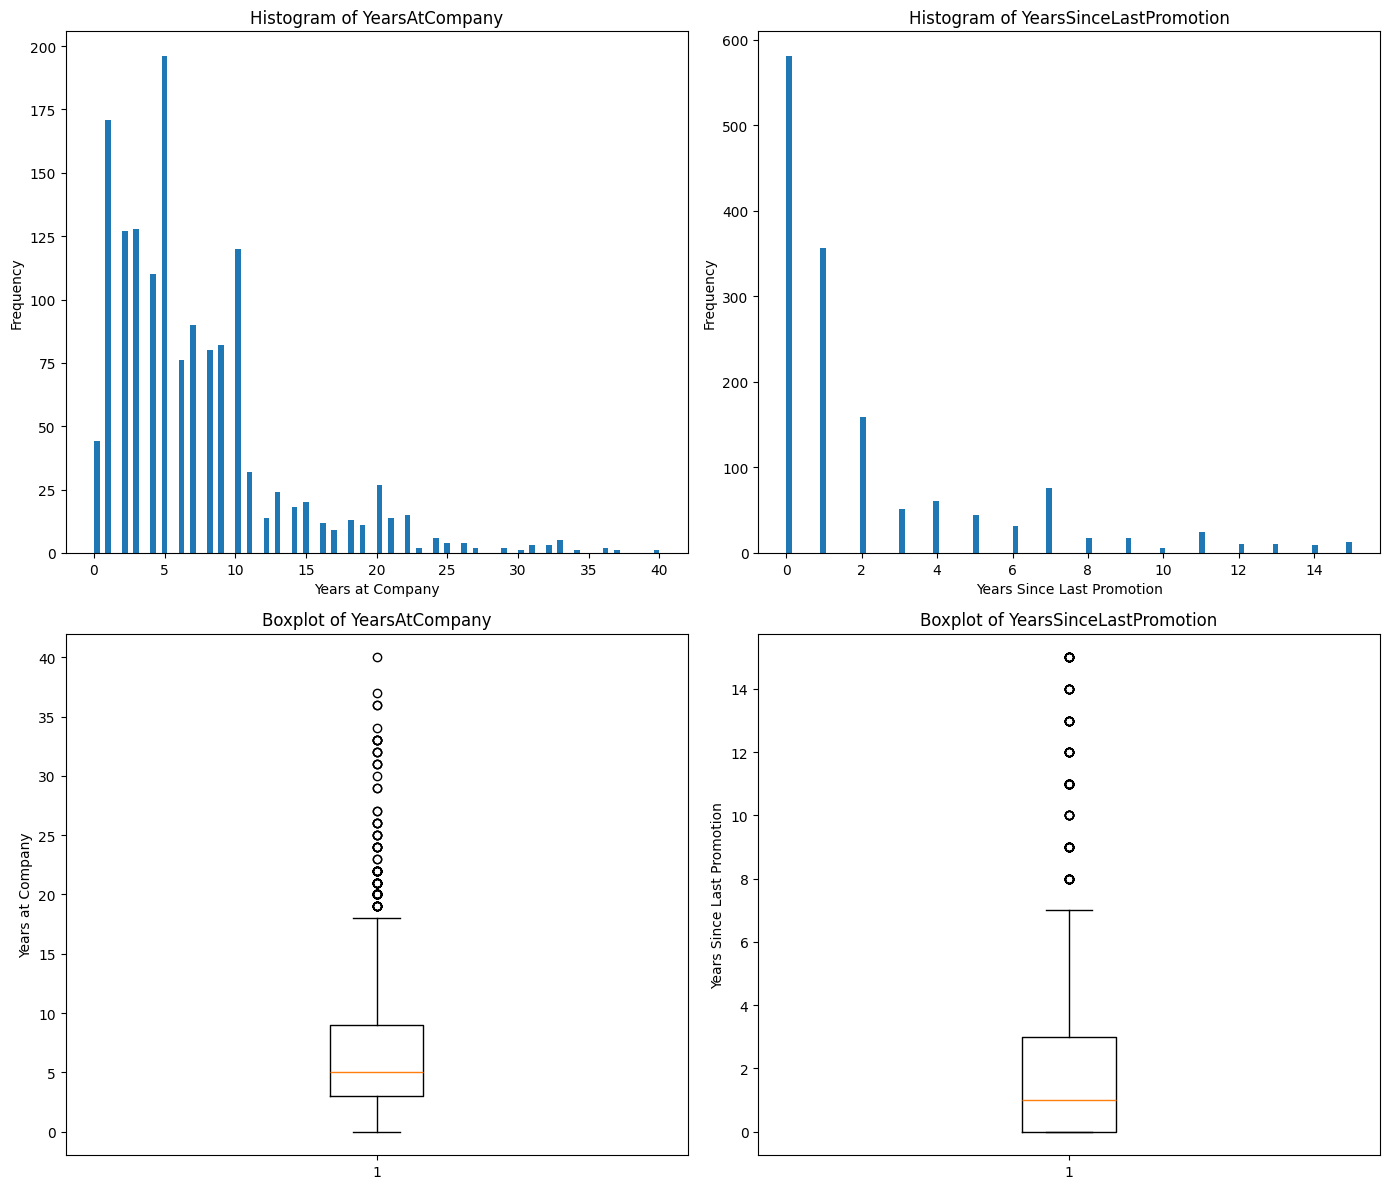

In [9]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot histogram for 'YearsAtCompany'
axes[0, 0].hist(df['YearsAtCompany'], bins=100)
axes[0, 0].set_title('Histogram of YearsAtCompany')
axes[0, 0].set_xlabel('Years at Company')
axes[0, 0].set_ylabel('Frequency')

# Plot histogram for 'YearsSinceLastPromotion'
axes[0, 1].hist(df['YearsSinceLastPromotion'], bins=100)
axes[0, 1].set_title('Histogram of YearsSinceLastPromotion')
axes[0, 1].set_xlabel('Years Since Last Promotion')
axes[0, 1].set_ylabel('Frequency')

# Boxplot for 'YearsAtCompany'
axes[1, 0].boxplot(df['YearsAtCompany'])
axes[1, 0].set_title('Boxplot of YearsAtCompany')
axes[1, 0].set_ylabel('Years at Company')

# Boxplot for 'YearsSinceLastPromotion'
axes[1, 1].boxplot(df['YearsSinceLastPromotion'])
axes[1, 1].set_title('Boxplot of YearsSinceLastPromotion')
axes[1, 1].set_ylabel('Years Since Last Promotion')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#### From the above plots, we get a more clear view of the outliers
#### Now lets examine how many of these outliers corresponds to Attrition

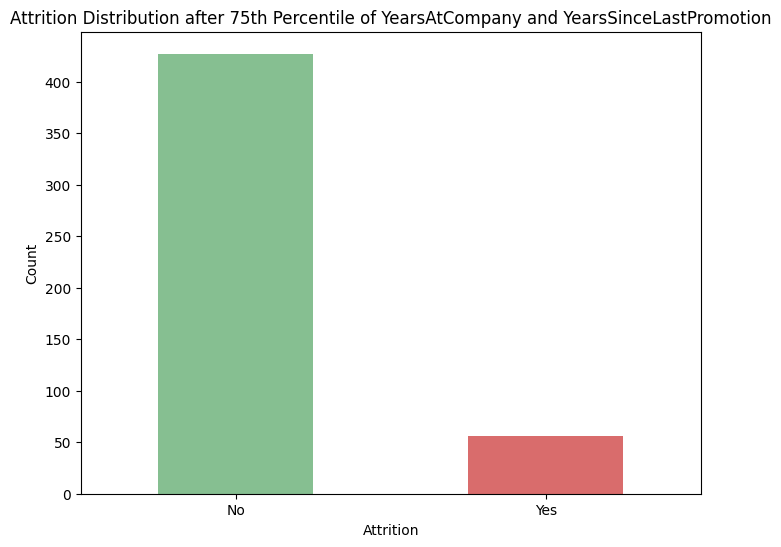

In [10]:
# Calculate 75th percentiles for both columns
years_at_company_75th = df['YearsAtCompany'].quantile(0.75)
years_since_last_promotion_75th = df['YearsSinceLastPromotion'].quantile(0.75)

# Filter rows where columns are greater than the 75th percentile
filtered_df = df[(df['YearsAtCompany'] > years_at_company_75th) |
                 (df['YearsSinceLastPromotion'] > years_since_last_promotion_75th)]

# Plotting the attrition classes for the filtered data
plt.figure(figsize=(8, 6))

# Plot the distribution of 'attrition' in the filtered data
filtered_df['Attrition'].value_counts().plot(kind='bar', color=['#86bf91', '#d96c6c'])
plt.title('Attrition Distribution after 75th Percentile of YearsAtCompany and YearsSinceLastPromotion')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [11]:
filtered_df.shape

(483, 35)

#### We observe that approximately 50 outliers are associated with attrition, while the majority are not. Since our focus is on identifying employees who may leave the company, we can retain the outliers linked to attrition and discard the others.

In [12]:
# # Filter rows from filtered_df where attrition is "Yes" 
condition = (df['Attrition'] == "Yes")
df1=filtered_df[condition]

C:\Users\Harsha\AppData\Local\Temp\ipykernel_9756\1345006690.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=filtered_df[condition]


In [13]:
df1.shape

(56, 35)

In [14]:
# Filter rows from df where columns are less than the 75th percentile
df2 = df[(df['YearsAtCompany'] <= years_at_company_75th) &
                 (df['YearsSinceLastPromotion'] <=years_since_last_promotion_75th)]

In [15]:
df2.shape

(987, 35)

In [16]:
# concat the above two dataframe
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [17]:
df.shape

(1043, 35)

### Transforming Data Types

#### Changing the non-numeric columns to "Category" Data-type

In [18]:
Non_Numeric_Columns=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
df[Non_Numeric_Columns] = df[Non_Numeric_Columns].astype('category')


#### Changing Binary Categorical Columns to Boolean

In [19]:
Binary_columns=['Attrition','Gender','Over18','OverTime']

In [20]:
df[Binary_columns].head()

,Attrition,Gender,Over18,OverTime
0,Yes,Female,Y,Yes
1,Yes,Female,Y,No
2,Yes,Male,Y,No
3,Yes,Female,Y,Yes
4,Yes,Male,Y,Yes


In [21]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Over18'] = df['Over18'].map({'Y': 1,'N':0}) 
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Display the updated dataframe
print(df[['Attrition', 'Gender', 'Over18', 'OverTime']].head())


  Attrition Gender Over18 OverTime
0         1      0      1        1
1         1      0      1        0
2         1      1      1        0
3         1      0      1        1
4         1      1      1        1


#### The following columns even though they are numeric but their values are limited to "1","2","3","4" & "5". Hence they can also be treated as categories.

In [22]:
cols=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating',
      'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

In [23]:
# Display unique values for each column in the list
for col in cols:
    print(f"Unique values in '{col}': {df[col].unique()}")
    print("."*150)

Unique values in 'Education': [1 3 2 4 5]
......................................................................................................................................................
Unique values in 'EnvironmentSatisfaction': [2 3 4 1]
......................................................................................................................................................
Unique values in 'JobInvolvement': [1 3 2 4]
......................................................................................................................................................
Unique values in 'JobLevel': [1 5 3 2 4]
......................................................................................................................................................
Unique values in 'JobSatisfaction': [1 3 4 2]
......................................................................................................................................................
Unique values in 

In [24]:
df[cols] = df[cols].astype('category')

In [25]:
df['Over18'].value_counts()

Over18
1    1043
Name: count, dtype: int64

In [26]:
df['EmployeeCount'].value_counts()

EmployeeCount
1    1043
Name: count, dtype: int64

In [27]:
df['StandardHours'].value_counts()

StandardHours
80    1043
Name: count, dtype: int64

#### Over18, StandardHours & EmployeeCount are fixed values for all rows and EmployeeNumber act as a primary key.
#### These features does not contribute any meaningful information or variability for our analysis or model. Including such a column can add Redundancy and unnecessarily increase the complexity

### Exploratory Data Analysis

#### Examining Categorical Columns

In [28]:
categorical_columns1 = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                       'JobRole', 'MaritalStatus', 'Education', 'OverTime']
categorical_columns2= ['EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating',
      'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
target_column = 'Attrition'

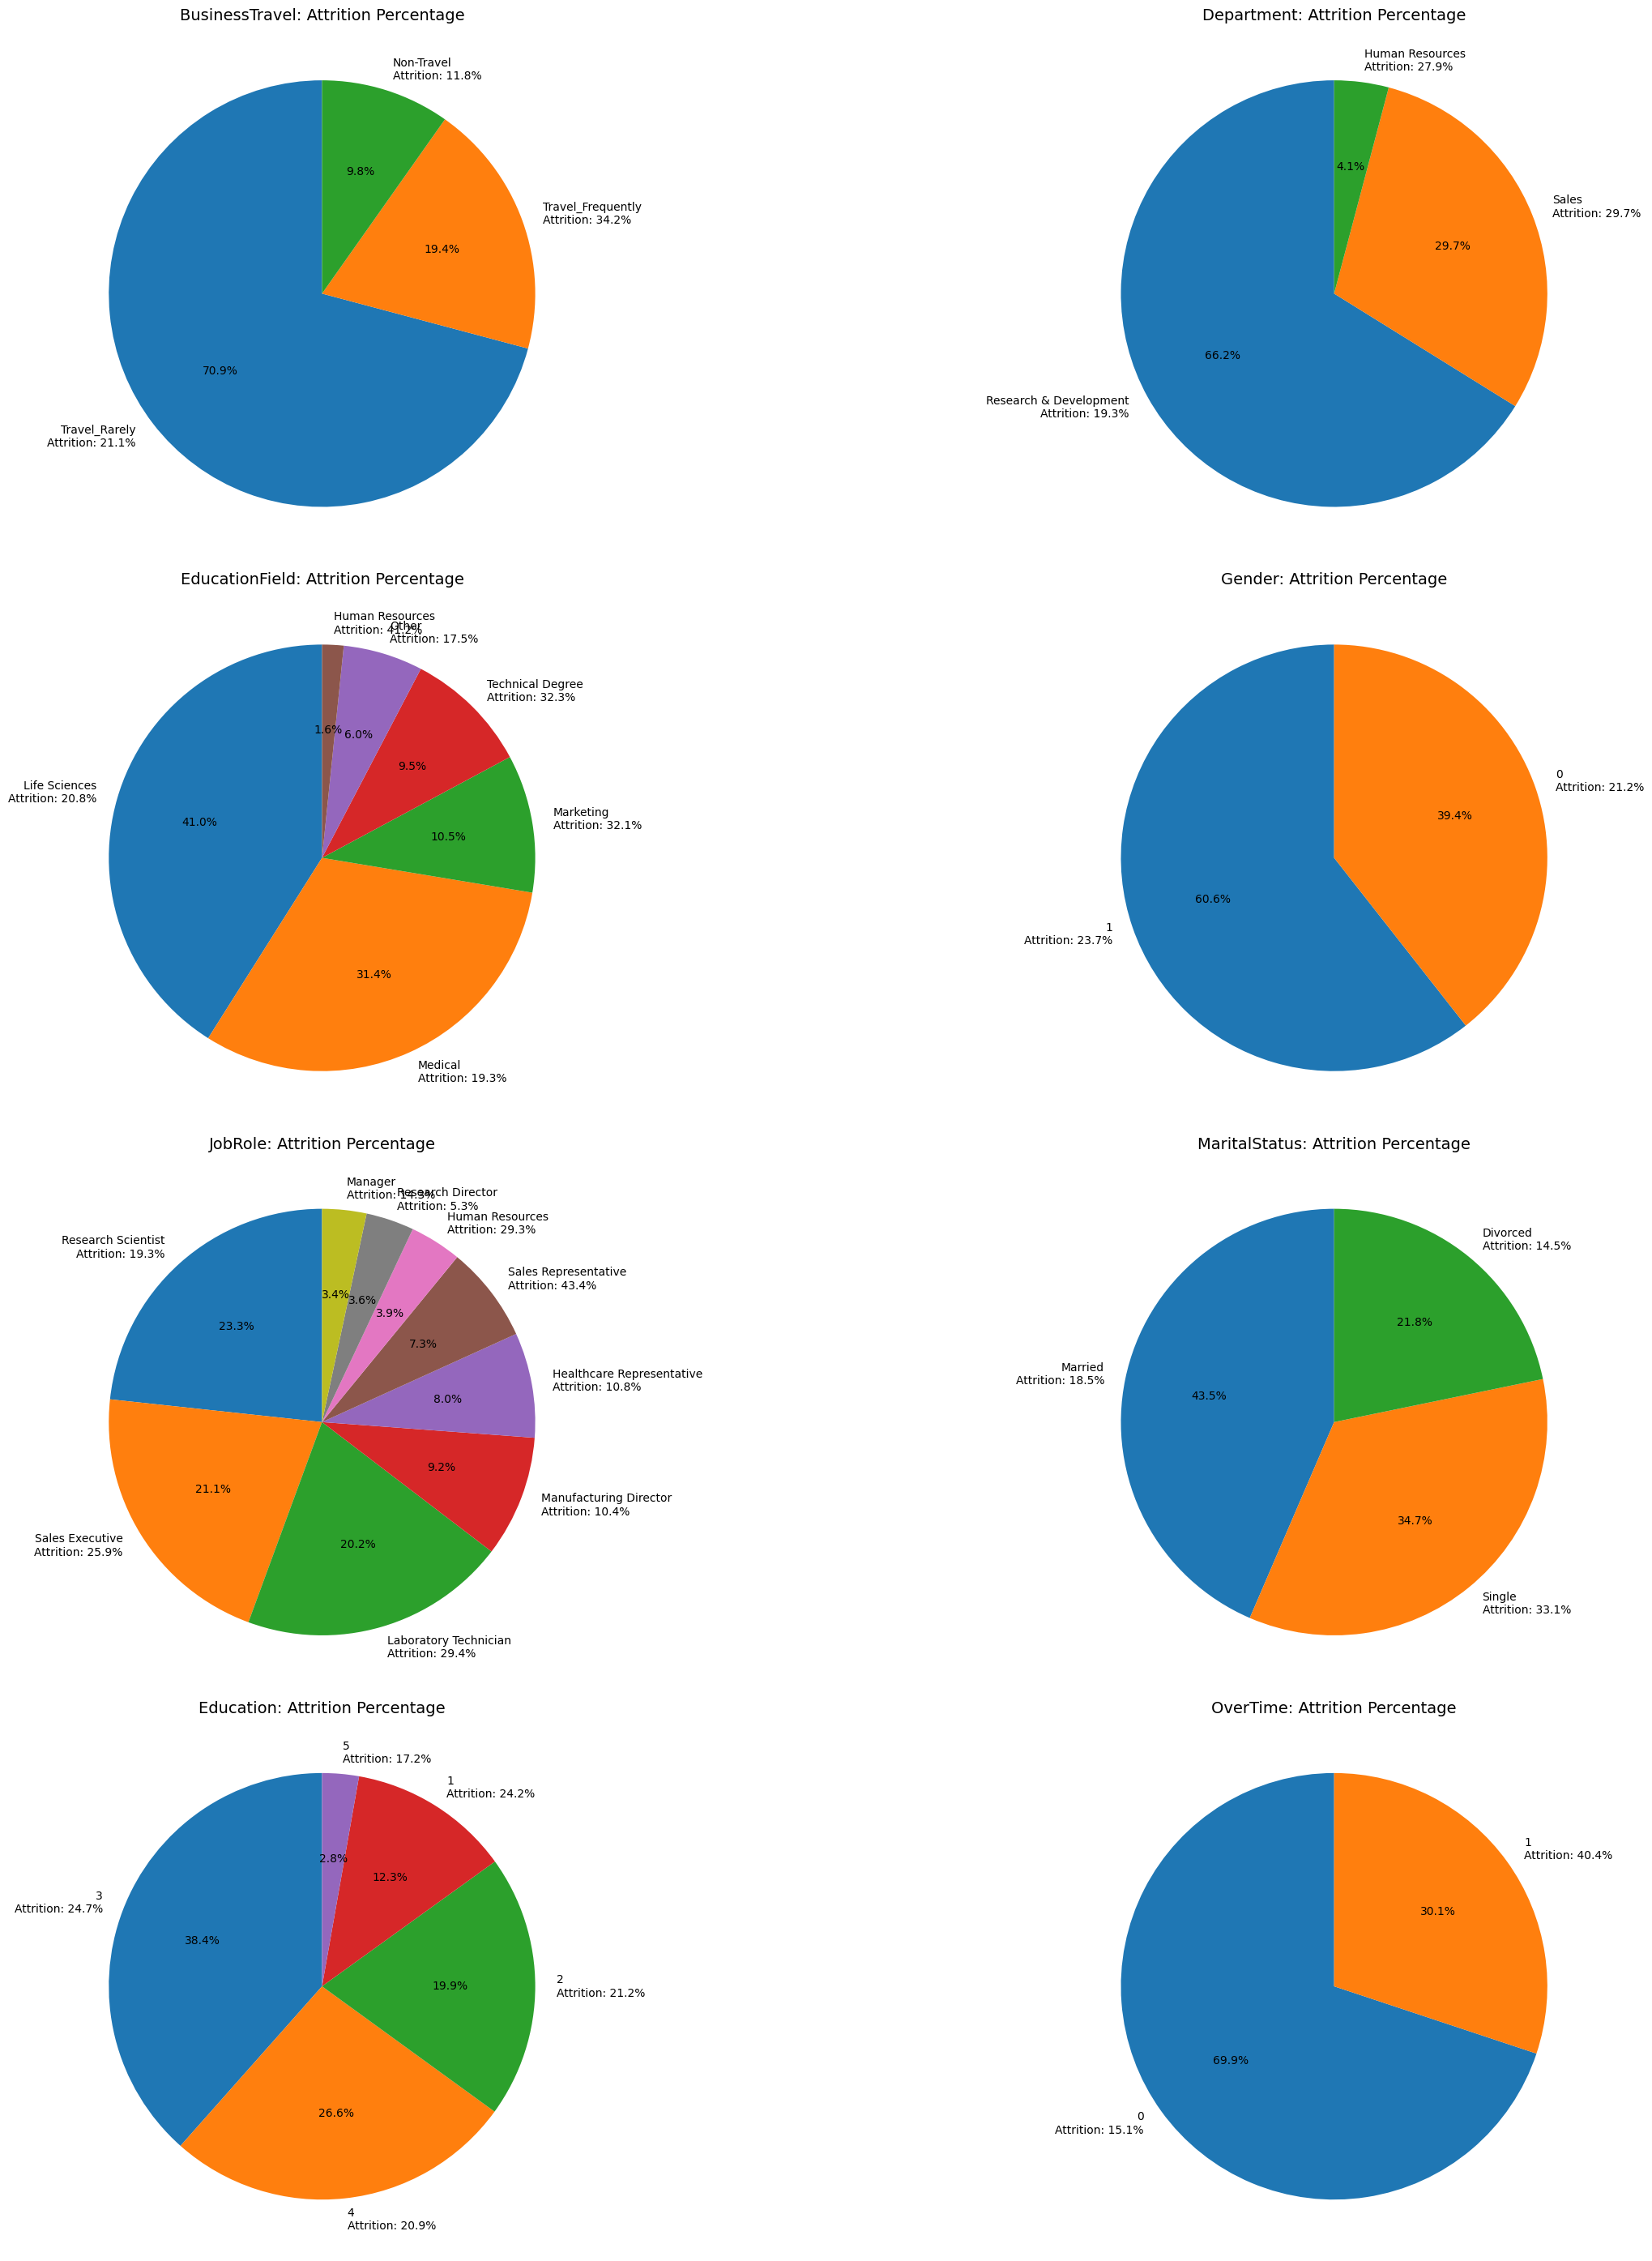

In [29]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(28, 28))
axes = axes.flatten()

# Iterate through categorical columns
for i, col in enumerate(categorical_columns1):
    # Calculate the total count of each group in the 'BusinessTravel' column
    group_sizes = df[col].value_counts()
    
    # Calculate the percentage of attrition (1) for each group
    attrition_percentages = (
        df.groupby(col, observed=False)[target_column]
        .value_counts(normalize=True)
        .unstack()[1] * 100  # Attrition=1 percentages
    ).fillna(0)

    # Prepare labels for the pie chart
    labels = []
    sizes = []
    
    # Combining the group size and attrition percentage for labels
    for label in group_sizes.index:
        group_size = group_sizes[label]
        attrition_pct = attrition_percentages.get(label, 0)  # Get attrition percentage for the group
        labels.append(f"{label}\nAttrition: {attrition_pct:.1f}%")
        sizes.append(group_size)
    
    # Create the pie chart
    axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10}
    )
    axes[i].set_title(f'{col}: Attrition Percentage', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

### Insights
#### 19.4% of employees frequently travel for business, and this group experiences a significantly higher attrition rate of 34.2%. It seems that employees who travel regularly have a higher likelihood of leaving the company.
#### Examining the Department chart, the sales department shows an attrition rate of 29.7%. However, the real concern lies within the HR department, which, although small at 4.1% of the workforce, has a troubling attrition rate of 27.9%, warranting attention from the company.
#### The Education field chart reveals that only 1.6% of employees have a degree related to Human Resources, yet they have a high attrition rate of 41.2%, indicating an elevated risk of turnover.
#### The Job Role chart highlights that sales representatives exhibit the highest attrition rate at 43.4%.
#### The Marital Status chart suggests that single employees are more likely to leave the company, with an attrition rate of 33.1% among 34.7% of employees who are single.
#### As anticipated, employees working overtime have a higher attrition rate of 40.4%, likely due to work-life balance challenges.
#### Overall, the company should focus on retaining employees in the HR department, despite its small size, as well as addressing the high turnover rates in the sales teams, among frequently traveling employees, and those working overtime. These factors are critical to improving employee retention.

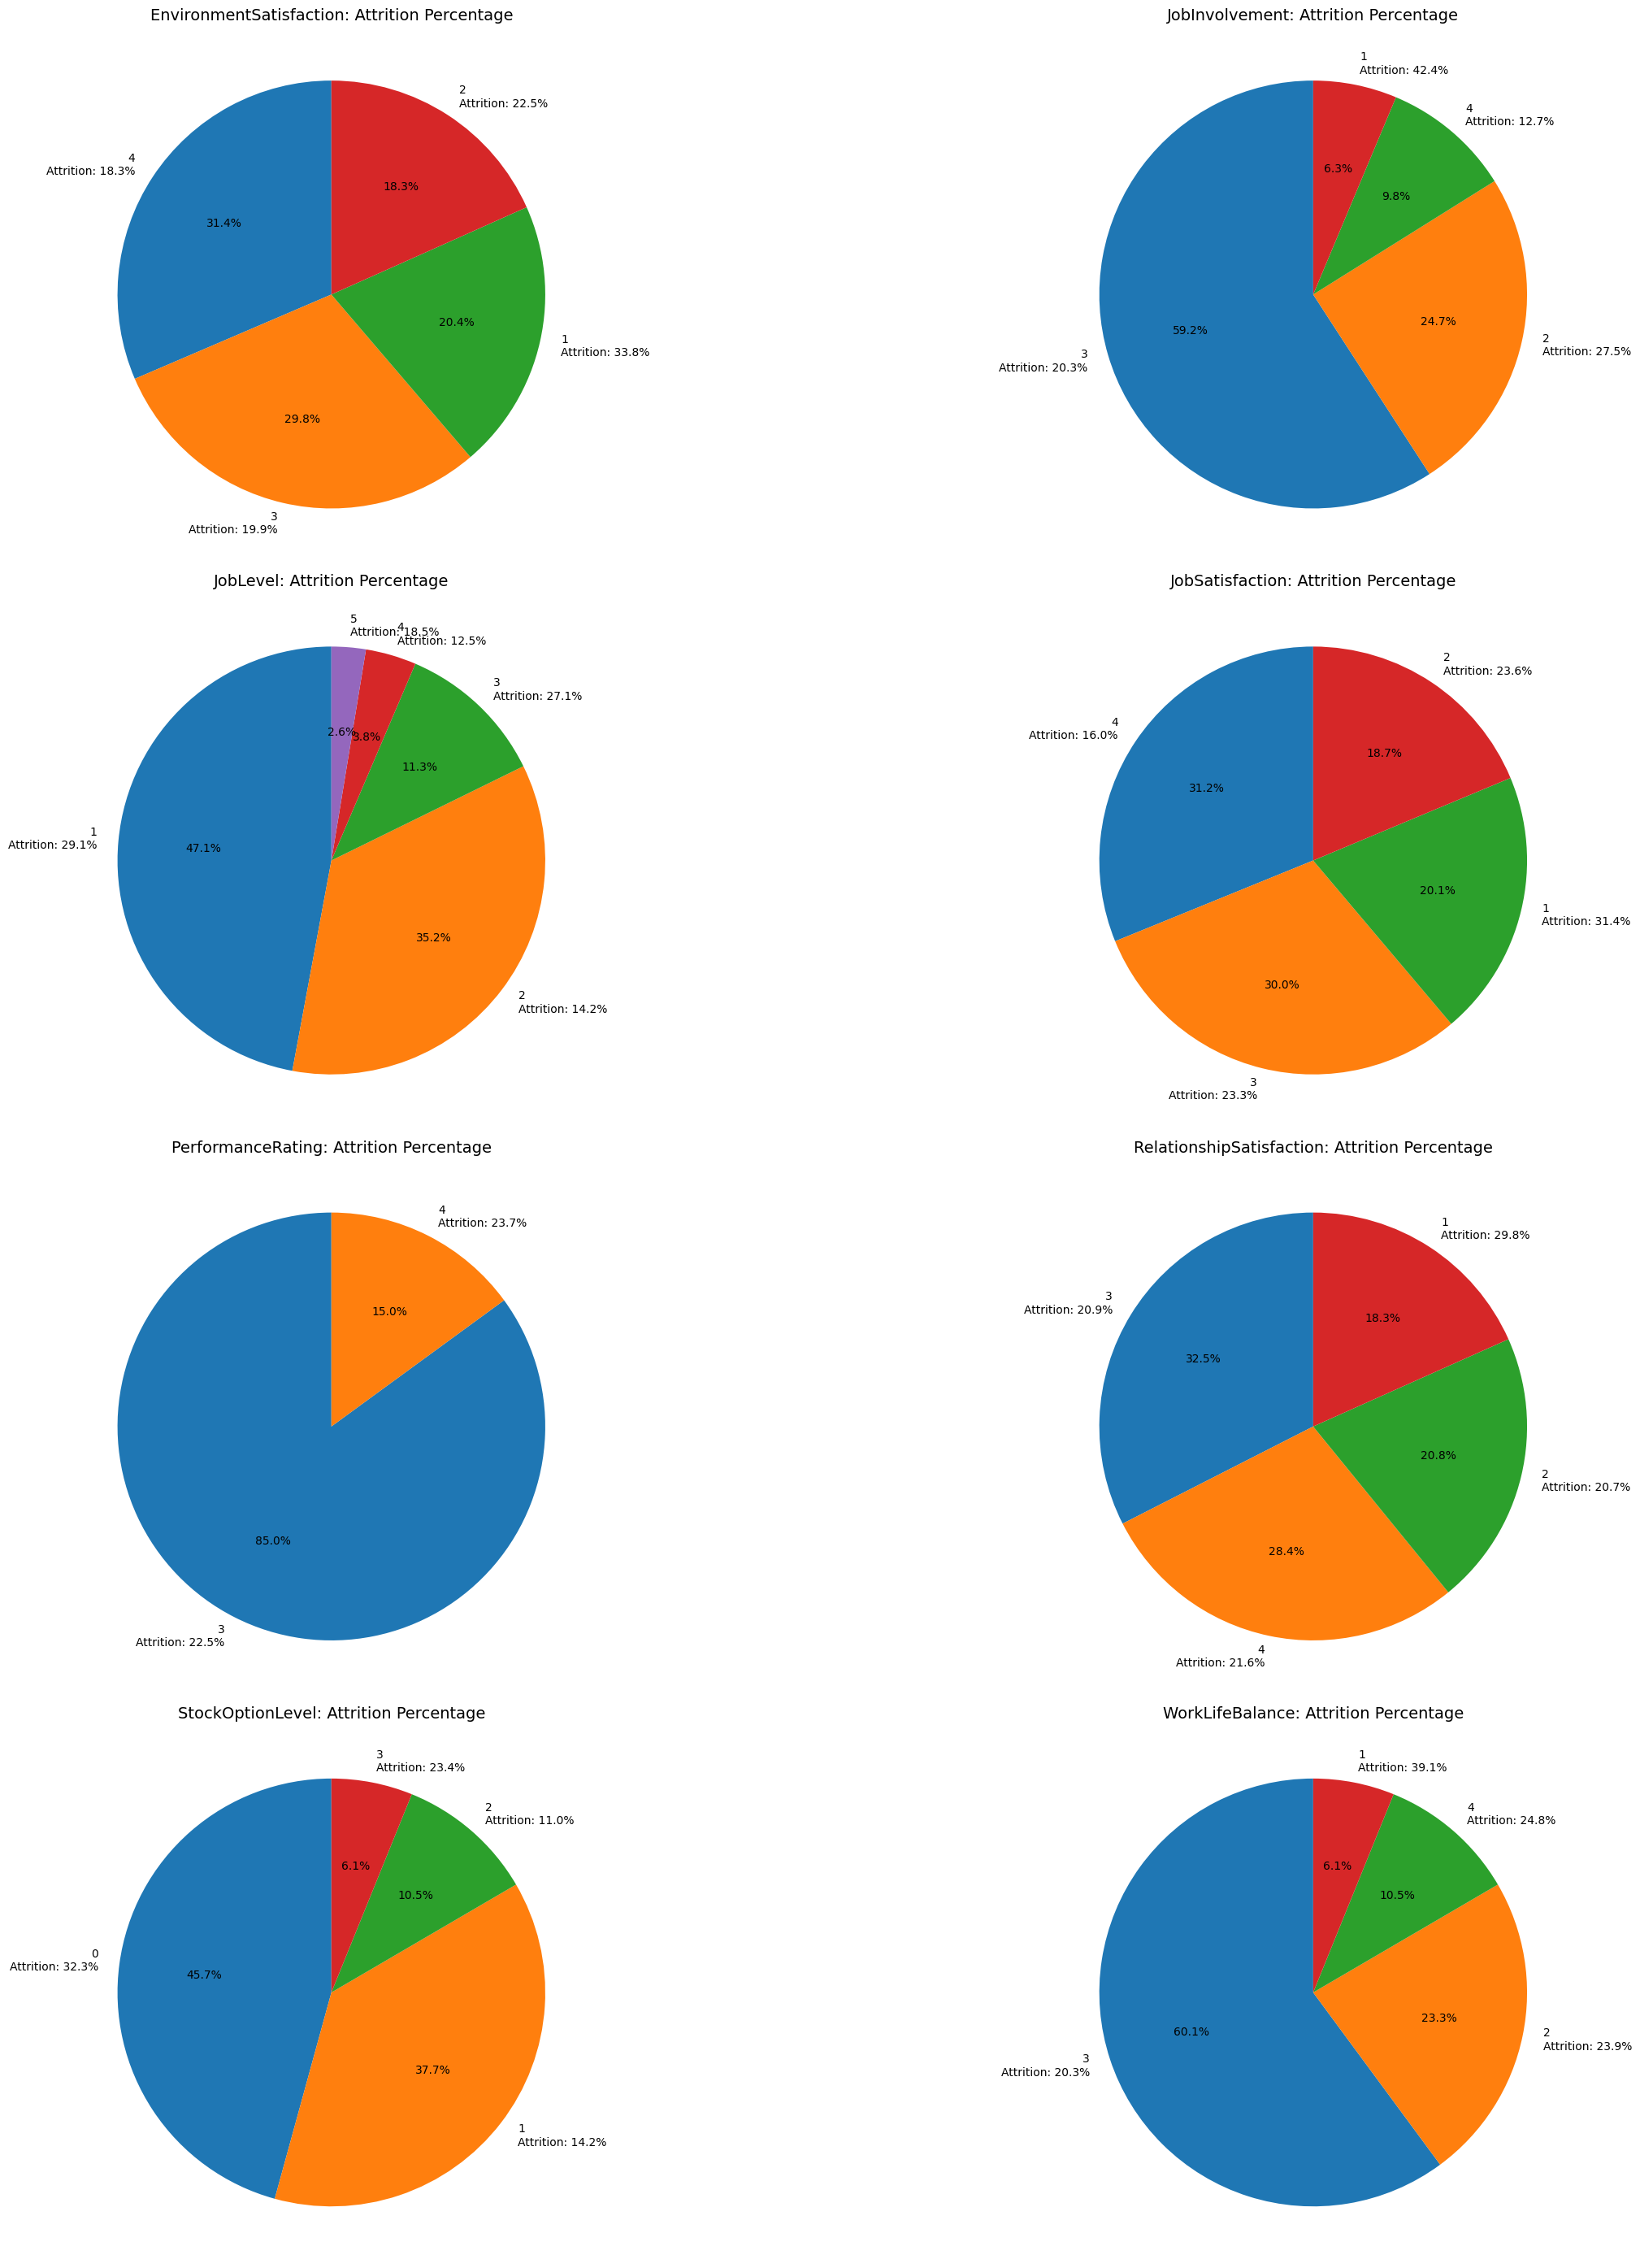

In [30]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(28, 28))
axes = axes.flatten()

# Iterate through categorical columns
for i, col in enumerate(categorical_columns2):
    # Calculate the total count of each group in the 'BusinessTravel' column
    group_sizes = df[col].value_counts()
    
    # Calculate the percentage of attrition (1) for each group
    attrition_percentages = (
        df.groupby(col, observed=False)[target_column]
        .value_counts(normalize=True)
        .unstack()[1] * 100  # Attrition=1 percentages
    ).fillna(0)

    # Prepare labels for the pie chart
    labels = []
    sizes = []
    
    # Combining the group size and attrition percentage for labels
    for label in group_sizes.index:
        group_size = group_sizes[label]
        attrition_pct = attrition_percentages.get(label, 0)  # Get attrition percentage for the group
        labels.append(f"{label}\nAttrition: {attrition_pct:.1f}%")
        sizes.append(group_size)
    
    # Create the pie chart
    axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10}
    )
    axes[i].set_title(f'{col}: Attrition Percentage', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

### Insights
#### In the Environment Satisfaction chart, employees who scored the lowest, i.e., "1", show the highest attrition rate of 33.8%. This indicates that poor work environment satisfaction is a strong predictor of employee turnover.
#### Similarly, in the Job Involvement chart, employees who are least engaged in their work, with a "1" score, exhibit the highest attrition rate of 42.4%. Low job involvement is clearly linked to higher turnover.
#### The Job Level chart reveals that junior-level employees with a "1" job level score experience the highest attrition at 29.1%, highlighting a potential issue at the entry-level positions. There's also a notable concern at Job Level 3, which accounts for 11.3% of employees. Despite the relatively low percentage, it has a significant attrition rate of 27.1%, signaling a need for more targeted support or development opportunities at this level.
#### As anticipated, employees with the lowest Job Satisfaction score, "1", have a high attrition rate of 31.4%. This suggests that dissatisfaction with the job is a major factor contributing to employee departure.
#### The Relationship Satisfaction chart shows that employees with a score of "1" in relationship satisfaction have the highest attrition rate of 29.8%. Poor relationships at work seem to be another factor driving turnover.
#### The Stock Option Level chart indicates that employees with no stock options have the highest attrition rate of 32.3%. This highlights a potential gap in employee benefits, especially for those not offered stock options.
#### As expected, the Work-Life Balance chart shows that employees with the worst work-life balance score of "1" are more likely to leave the company, with an attrition rate of 39.1%. A lack of work-life balance is a significant contributor to turnover.
### Recommended Action Steps:
#### Improve Environment Satisfaction: Implement initiatives to enhance the workplace environment, such as improving office facilities, promoting a culture of open communication, and providing opportunities for employee feedback.
#### Increase Job Involvement: Foster greater job involvement by involving employees in decision-making processes, offering opportunities for skill development, and ensuring that tasks are meaningful and aligned with personal growth.
#### Focus on Junior-Level Employees: Provide additional training, mentorship, and career development programs to support junior employees. This could increase retention and improve job satisfaction at the entry-level.
#### Address Issues at Job Level 3: Investigate the causes of high attrition at this level despite its smaller size. Offering career progression, additional support, or recognition may reduce turnover at this level.
#### Enhance Job Satisfaction: Focus on improving job satisfaction by offering more meaningful work, opportunities for advancement, and better alignment of roles with employees' interests and skills.
#### Improve Relationship Satisfaction: Offer team-building activities, conflict resolution training, and encourage managers to foster better interpersonal relationships among team members to address issues of relationship satisfaction.
#### Stock Options for Employees: Consider offering stock options or other attractive benefits to employees without stock options, particularly those in critical roles, to increase engagement and retention.
#### Promote Work-Life Balance: Offer flexible working hours, remote work options, and mental health support to improve work-life balance and reduce the high attrition rate among employees struggling in this area.

#### Lets further use Chi-Square Test to Check if there's a statistically significant association between the categorical variables and Attrition.

In [31]:
from scipy.stats import chi2_contingency

In [32]:
categorical_columns1.extend(categorical_columns2)

In [33]:
categorical_columns=categorical_columns1

In [34]:
print(categorical_columns)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Education', 'OverTime', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


In [35]:
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['Attrition'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{column}: p-value = {p}")
    if p < 0.05:
        print(f"Significant relationship with Attrition (p < 0.05)")
    else:
        print(f"No significant relationship with Attrition (p >= 0.05)")
    print("."*150)

BusinessTravel: p-value = 9.568163598637415e-06
Significant relationship with Attrition (p < 0.05)
......................................................................................................................................................
Department: p-value = 0.000974593428942253
Significant relationship with Attrition (p < 0.05)
......................................................................................................................................................
EducationField: p-value = 0.0028375019217542936
Significant relationship with Attrition (p < 0.05)
......................................................................................................................................................
Gender: p-value = 0.37300637345489196
No significant relationship with Attrition (p >= 0.05)
......................................................................................................................................................
JobRole: p-

#### Based on above statistical test we can eliminate Gender, Education, PerformanceRating, & RelationshipSatisfaction in our analysis

In [36]:
final_categorical_columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'EnvironmentSatisfaction', 
                           'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

### Examine Numerical Columns

#### Creating new features

In [43]:
# 1. Tenure in the Company (Employee Tenure)
df['TenureInCompany'] = df['YearsAtCompany'] + df['YearsInCurrentRole']

# 2. Promotion Recency Ratio
df['PromotionRecency'] = np.where((df['YearsSinceLastPromotion'] == 0) | (df['YearsAtCompany'] == 0), 0, df['YearsSinceLastPromotion'] / df['YearsAtCompany'])

# 3. Income-to-Experience Ratio
df['IncomeToExperienceRatio'] = np.where(df['TotalWorkingYears'] == 0, 0, df['MonthlyIncome'] / df['TotalWorkingYears'])
# 4. Salary Hike Efficiency
df['SalaryHikeEfficiency'] = np.where(df['TotalWorkingYears'] == 0, 0, df['PercentSalaryHike'] / df['TotalWorkingYears'])

In [46]:
numerical_columns=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','TenureInCompany','IncomeToExperienceRatio','PromotionRecency','SalaryHikeEfficiency']

#### Correlation Matrix

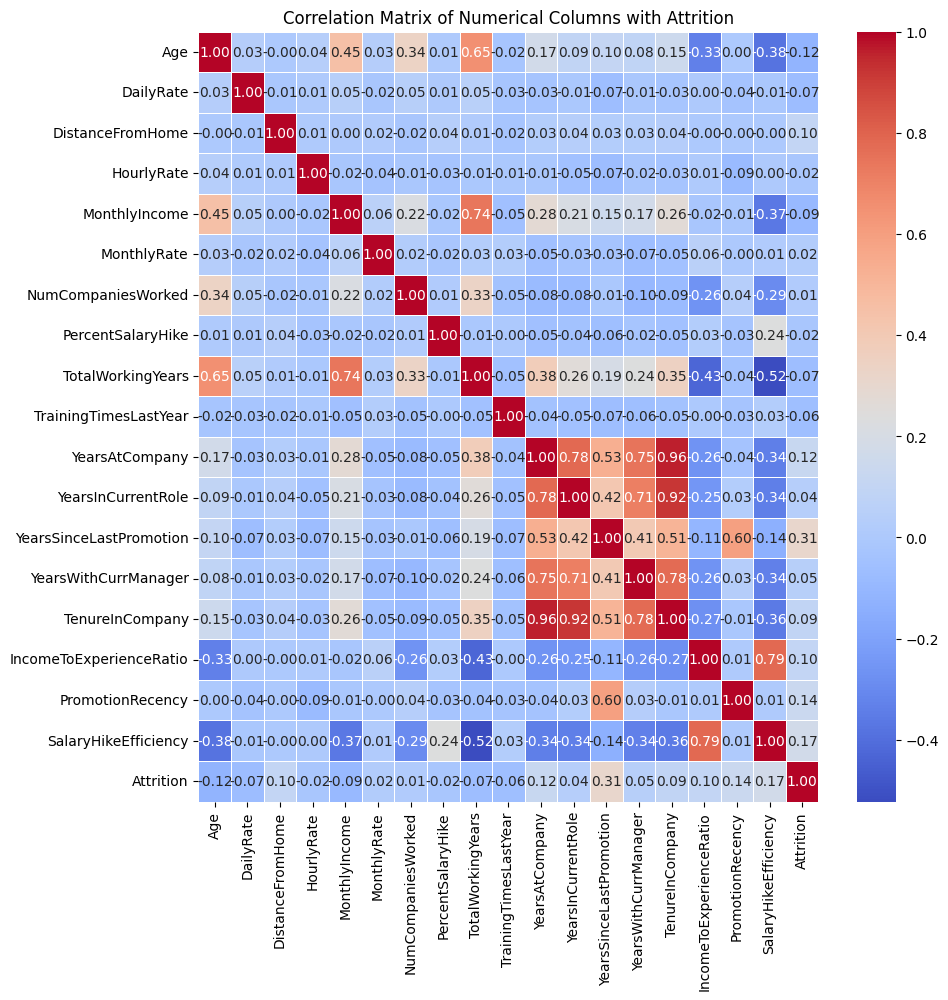

In [47]:
# Create a correlation matrix including 'Attrition' and numerical columns
correlation_matrix = df[numerical_columns + ['Attrition']].corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns with Attrition')
plt.show()

#### According to the heatmap, the variable "YearsSinceLastPromotion" shows the strongest positive correlation with Attrition, scoring 0.31, followed by "SalaryHikeEfficiency" at 0.17, "PromotionRecency" at 0.14, "YearsAtCompany" at 0.12 and "IncomeToExperienceRatio" at 0.10.
#### Additionally, "Age" displays a negative correlation with Attrition, with a score of -0.12.
#### In summary, employees who haven't been promoted recently, have a higher salary hike efficiency, or have a longer tenure with the company are more likely to leave. Furthermore, employees with a lower income-to-experience ratio are at a higher risk of attrition. On the other hand, older employees tend to have a lower likelihood of leaving the company.
#### But correlation does not imply causation. Correlation only indicates that two variables move together, but it doesn't mean that one causes the other. To establish causation, we need to perform additional analysis

### Logistic Regression Analysis

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
# Split the dataset into features (X) and target (y)
X = df[numerical_columns]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

In [50]:
# Fit the model
logreg.fit(X_train, y_train)

C:\Users\Harsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [51]:
y_pred = logreg.predict(X_test)

In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8051
Confusion Matrix:
[[235   7]
 [ 54  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89       242
           1       0.71      0.24      0.36        71

    accuracy                           0.81       313
   macro avg       0.76      0.61      0.62       313
weighted avg       0.79      0.81      0.77       313



In [53]:
# Get the coefficients
coefficients = logreg.coef_[0]

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'Feature': numerical_columns,
    'Coefficient': coefficients
})

# Sort coefficients by absolute value for easier interpretation
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients
print(coefficients_df)

                    Feature  Coefficient  Abs_Coefficient
12  YearsSinceLastPromotion     0.541706         0.541706
6        NumCompaniesWorked     0.164838         0.164838
17     SalaryHikeEfficiency     0.164224         0.164224
10           YearsAtCompany     0.150919         0.150919
11       YearsInCurrentRole    -0.141901         0.141901
9     TrainingTimesLastYear    -0.121636         0.121636
7         PercentSalaryHike    -0.076956         0.076956
0                       Age    -0.048090         0.048090
13     YearsWithCurrManager    -0.043974         0.043974
16         PromotionRecency     0.035476         0.035476
2          DistanceFromHome     0.027062         0.027062
14          TenureInCompany     0.009018         0.009018
8         TotalWorkingYears     0.005168         0.005168
15  IncomeToExperienceRatio    -0.000272         0.000272
1                 DailyRate    -0.000269         0.000269
3                HourlyRate    -0.000145         0.000145
4             

#### The "YearsSinceLastPromotion", "SalaryHikeEfficiency" and "YearsAtCompany" aligns well with the heatmap, showing a positive relationship with attrition.
#### "PromotionRecency" also shows a positive relationship, though it's weaker than suggested in the heatmap.
#### "IncomeToExperienceRatio" shows a much weaker positive relationship than indicated in the heatmap infact its coefficient is negative.
#### "Age" does have a negative relationship with attrition, but it's weaker than the correlation shown in the heatmap.

In [54]:
final_numerical_columns=['Age', 'DistanceFromHome',
        'NumCompaniesWorked', 'PercentSalaryHike',
         'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','PromotionRecency','SalaryHikeEfficiency']

In [55]:
final_features= final_categorical_columns + final_numerical_columns

In [56]:
len(final_features)

23

In [61]:
for i in range(1,len(final_features)+1):
    print (f"{i}:{final_features[i-1]}")

1:BusinessTravel
2:Department
3:EducationField
4:JobRole
5:MaritalStatus
6:OverTime
7:EnvironmentSatisfaction
8:JobInvolvement
9:JobLevel
10:JobSatisfaction
11:StockOptionLevel
12:WorkLifeBalance
13:Age
14:DistanceFromHome
15:NumCompaniesWorked
16:PercentSalaryHike
17:TrainingTimesLastYear
18:YearsAtCompany
19:YearsInCurrentRole
20:YearsSinceLastPromotion
21:YearsWithCurrManager
22:PromotionRecency
23:SalaryHikeEfficiency


#### Conclusion
The analysis and modeling of employee attrition using the recommended features provide a comprehensive approach to understanding the key drivers of attrition and performance. These features capture a mix of demographic, job-related, and behavioral factors, ensuring a well-rounded perspective. For example, variables like BusinessTravel, MaritalStatus, and OverTime help uncover lifestyle influences on attrition, while EnvironmentSatisfaction and JobSatisfaction gauge workplace experience. Performance-related metrics, such as JobInvolvement, TrainingTimesLastYear, and PromotionRecency, allow the identification of factors critical to employee growth and productivity. Advanced metrics like SalaryHikeEfficiency and PromotionRecency offer unique insights into compensation and career development trends.

Overall, this feature set not only enables the identification of top attrition reasons but also provides actionable insights to improve retention strategies, enhance employee satisfaction, and drive performance. With predictive modeling, these features can help organizations optimize HR policies, reduce attrition rates, and foster a more engaged workforce.